In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.isnull().sum()    # checking for null values

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
data.shape

(1190, 12)

In [32]:
data[data['target']==1].shape , data[data['target']==0].shape    # dataset is pretty 'balanced'

((629, 12), (561, 12))

### Age vs heart disease

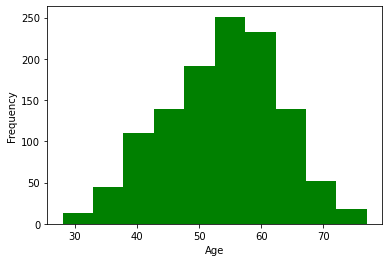

In [34]:
data["age"].plot(kind="hist", color="green")
plt.xlabel("Age")
plt.show()
# heart disease are more likely as you grow older

### Age and heart rate vs heart disease

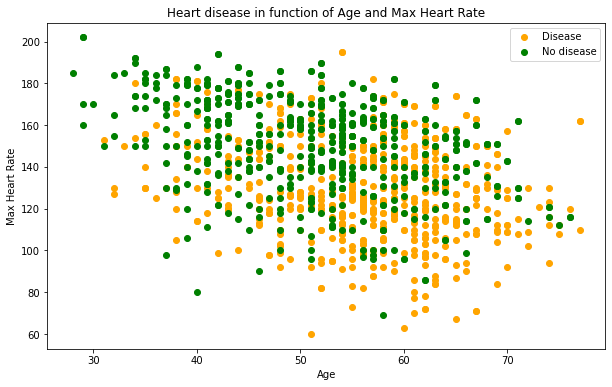

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(data["age"][data["target"]==1], data["max heart rate"][data["target"]==1], c="orange")
plt.scatter(data["age"][data["target"]==0], data["max heart rate"][data["target"]==0], c="green")
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);

This graph confirms our suspicions - as the patients grow older the more of them suffer from heart disease. There is a peak around the 60 years mark, which tends starts to drop off. Grimly, we can understand it as a natural occurence, since if someone suffers from a heart disease they are less likely to grow older.

### Heart disease vs sex

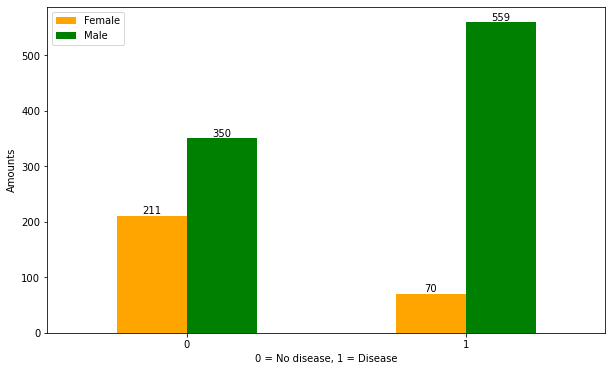

In [33]:
# Compare target column with sex column
fig, ax = plt.subplots()
pd.crosstab(data["target"], data["sex"]).plot(kind="bar", figsize=(10, 6), color=["orange", "green"], ax=ax)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amounts");

# males are tends to have heart disease more

### Chest pain vs heart disease

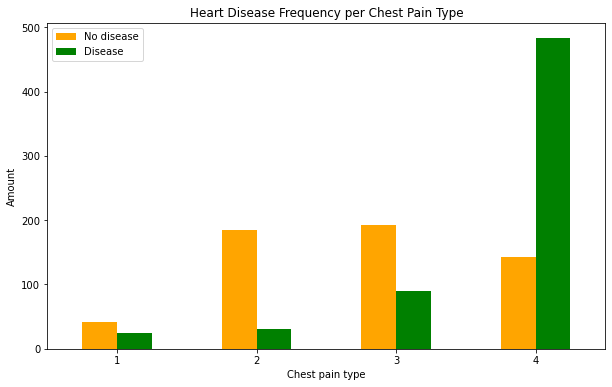

In [38]:
pd.crosstab(data["chest pain type"], data["target"]).plot(kind="bar", figsize=(10, 6), color=["orange", "green"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);


### Check for outliers

Checking for outliers in attributes like resting bp s, cholestrol, max heart rate, old peak. Other attributes are categorical.

/Users/Raeez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resting bp s', ylabel='target'>

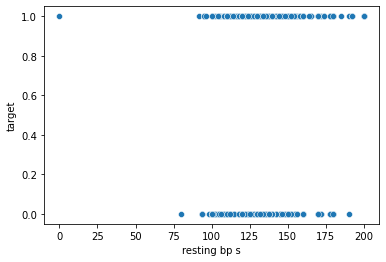

In [7]:
sns.scatterplot(data['resting bp s'], data['target'])

In [8]:
data[data['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [9]:
data.loc[data['resting bp s'] == 0] = np.nan  # taking care of the outliers

/Users/Raeez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol', ylabel='target'>

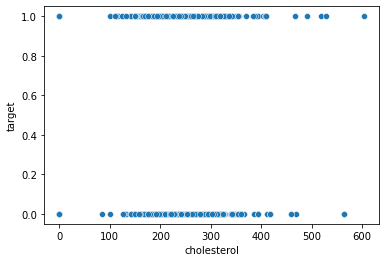

In [10]:
sns.scatterplot(data['cholesterol'], data['target'])

In [11]:
data.cholesterol[data['cholesterol'] == 0] = np.nan  # making the cholestrol zero data points as null value

In [12]:
data['cholesterol'].isnull().sum()

172

In [13]:
mean_chol = data['cholesterol'].mean()
data['cholesterol'].fillna(mean_chol, inplace = True)  # filling the null value with mean value

In [14]:
data['cholesterol'].isnull().sum()

0

/Users/Raeez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max heart rate', ylabel='target'>

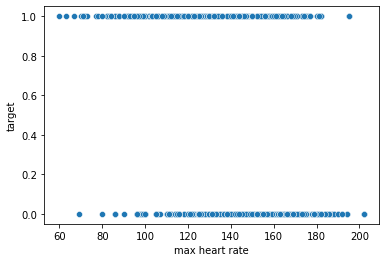

In [15]:
sns.scatterplot(data['max heart rate'], data['target'])

/Users/Raeez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak', ylabel='target'>

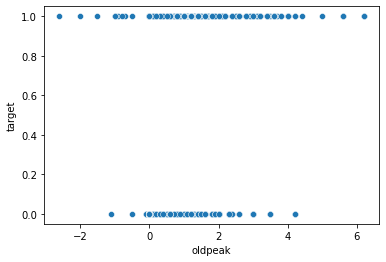

In [16]:
sns.scatterplot(data['oldpeak'], data['target'])

In [17]:
data.isnull().sum()

age                    1
sex                    1
chest pain type        1
resting bp s           1
cholesterol            0
fasting blood sugar    1
resting ecg            1
max heart rate         1
exercise angina        1
oldpeak                1
ST slope               1
target                 1
dtype: int64

In [18]:
data.dropna(inplace = True)

In [19]:
data.shape

(1189, 12)

In [20]:
data[data['target']==1].shape , data[data['target']==0].shape

((628, 12), (561, 12))

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1189 non-null   float64
 1   sex                  1189 non-null   float64
 2   chest pain type      1189 non-null   float64
 3   resting bp s         1189 non-null   float64
 4   cholesterol          1189 non-null   float64
 5   fasting blood sugar  1189 non-null   float64
 6   resting ecg          1189 non-null   float64
 7   max heart rate       1189 non-null   float64
 8   exercise angina      1189 non-null   float64
 9   oldpeak              1189 non-null   float64
 10  ST slope             1189 non-null   float64
 11  target               1189 non-null   float64
dtypes: float64(12)
memory usage: 120.8 KB


In [22]:
x = data.drop('target', axis =1)
y = data.target

In [270]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 36)

In [212]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [273]:
svc_pipe = Pipeline([('mms', MinMaxScaler()),('svc', SVC(gamma=5, C=13, kernel='rbf', random_state=5))])
svc_pipe.fit(xtrain, ytrain)
svc_pipe.score(xtest, ytest)

0.8926174496644296

In [272]:
rfc_pipe = Pipeline([('mms', MinMaxScaler()), ('rfc', RandomForestClassifier(n_estimators=550, max_depth=30,
                                                                     max_leaf_nodes=125, random_state=26))])
rfc_pipe.fit(xtrain, ytrain)
rfc_pipe.score(xtest, ytest)

0.9463087248322147

In [237]:
lgc_pipe = Pipeline([('mms', MinMaxScaler()), ('lgc', LogisticRegression(C=2))])
lgc_pipe.fit(xtrain, ytrain)
lgc_pipe.score(xtest, ytest)

0.8322147651006712

In [271]:
knn_pipe = Pipeline([('mms', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))])
knn_pipe.fit(xtrain, ytrain)
knn_pipe.score(xtest, ytest)

0.9228187919463087